In [1]:
# Let's take a look at basic Science data functionality with the GBM Data Tools
# Science file in Cspec which is binned in for both Energy and time.
from gbm.data import Cspec

/home/lonewolf/mambaforge/lib/python3.10/site-packages/gbm/plot/lal_post_subs.py:184: UserWarning: Basemap not installed. Some functionality not available.
  warnings.warn('Basemap not installed. Some functionality not available.')


In [2]:
# import Cspec file
cspec = Cspec.open('glg_cspec_n2_bn220921462_v00.pha')

In [3]:
cspec

In [4]:
# Time range covered by the file
cspec.time_range

(-2866.480353832245, 4003.928243994713)

In [5]:
# Trigger time in the file (Trigger Time = Fermi Mission Elapsed Time)
cspec.trigtime

685451164.071294

In [6]:
# Energy range (in MeV) covered by cspec file
cspec.energy_range

(4.6393914, 2000.0)

In [7]:
# Number of energy channels in the file
cspec.numchans

128

In [8]:
# GBM data stores in the fits format or Metada stores as headers
# Number of headers in the file
cspec.headers.keys()

odict_keys(['PRIMARY', 'EBOUNDS', 'SPECTRUM', 'GTI'])

In [9]:
# Primary headers in the file
# To access any of the keywords, use astropy.io.fits
cspec.headers['PRIMARY']

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                    8 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
CREATOR = 'GBM_SCI_Reader.pl v1.20' / Software and version creating file        
FILETYPE= 'PHAII   '           / Name for this type of FITS file                
FILE-VER= '1.0.0   '           / Version of the format for this filetype        
TELESCOP= 'GLAST   '           / Name of mission/satellite                      
INSTRUME= 'GBM     '           / Specific instrument used for observation       
DETNAM  = 'NAI_02  '           / Individual detector name                       
OBSERVER= 'Meegan  '        

In [10]:
# Data stored in the cspec file can be directly accessed as
# TimeEnergyBins is 2D histogram contains properties such as slicing over time and energy &
# Integrating over time and energy
cspec.data

In [11]:
# Lightcurve in the range 100 s before and 100 s after the TrigTime 
# Energy range in MeV
lc = cspec.to_lightcurve(time_range = (-100.0, 100.0), energy_range = (100.0, 300000.0))

In [12]:
# Variety of functions of lightcurve can be retrieved such as
# 1. lc.centroids
# 2. lc.closest_edge
# 3. lc.contiguous_bins
# 4. lc.count_uncertainty
# 5. lc.counts
# 6. lc.exposure
# 7. lc.from_fits_array
# 8. lc.hi_edges
# 9. lc.lo_edges
# 10. lc.merge
# 11. lc.range
# 12. lc.rate_uncertainty
# 13. lc.rates
# 14. lc.rebin
# 15. lc.size
# 16. lc.slice

In [13]:
# Range of the lightcurve
lc.range

(-101.6337879896164, 100.09768211841583)

In [14]:
# Number of bins
lc.size

122

In [15]:
# Number of counts in each bin
lc.counts

array([1318, 1293, 1313, 1244, 1263, 1282, 1325, 1306, 1287, 1303, 1303,
       1341, 1299, 1329, 1280, 1326, 1251, 1306, 1320, 1318, 1308, 1284,
       1306, 1308, 1131,  753,  564,  553,  545,  617,  749, 1095, 1054,
       1097,  836, 1230,  836,  663,  891,  568,  377,  376,  373,  414,
        453,  407,  449,  394,  386,  371,  368,  371,  403,  325,  360,
        356,  394,  543,  473,  534,  442,  390,  335,  340,  338,  337,
        359,  359,  338,  334,  314,  282,  316,  357,  337,  339,  331,
        325,  349,  311,  326,  364,  356,  340,  356,  343,  343,  320,
        301,  374,  345,  335,  322,  350,  336,  308,  309,  336,  337,
        331,  338,  323,  321,  337,  325,  309,  322,  322,  353,  291,
        352,  342,  337,  336,  346,  341,  325,  314,  308,  325,  329,
        317], dtype=uint64)

In [16]:
# Plotting Lightcurve
from gbm.plot import Lightcurve
import matplotlib.pyplot as plt

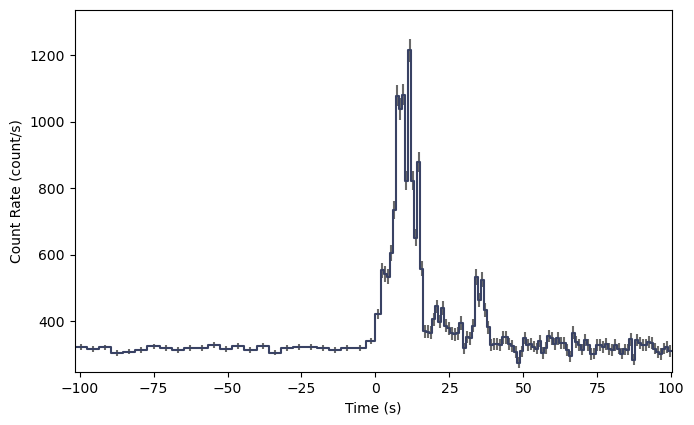

In [17]:
lcplot = Lightcurve(data=lc)
plt.show()

In [18]:
# Checking the color of the lightcurve
lcplot.lightcurve.color

'#394264'

In [19]:
# Change the color of the lightcurve
lcplot.lightcurve.color = 'red'

In [20]:
# Selecting the time range from the lightcurve
spec = cspec.to_spectrum(time_range = (0.0, 40.0))

In [21]:
# Plotting the Spectrum of the selected time_range
from gbm.plot import Spectrum

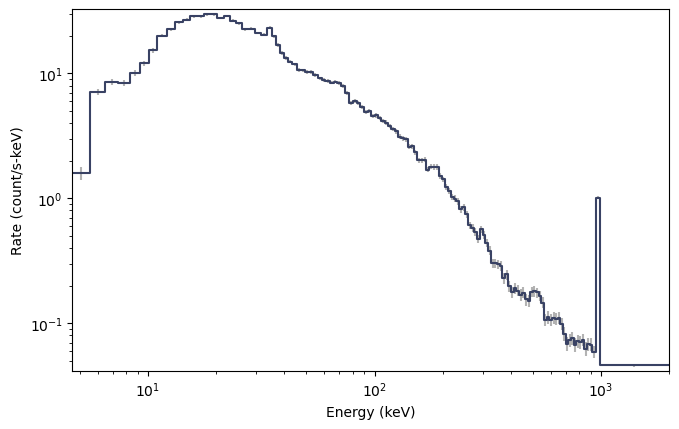

In [22]:
# Counts spectrum
specplot = Spectrum(data = spec)